<a href="https://colab.research.google.com/github/azzindani/02_Machine_Learning/blob/main/Diseases_And_Symptoms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Version 20240803

## 00 Importing Modules & Mounting Drive

In [1]:
#!pip install ydata-profiling

In [2]:
import pathlib
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import os
import numpy as np
import pandas as pd
import sklearn
import pickle
import plotly.express as px
import plotly.graph_objects as go

from scipy import stats as sm
from IPython.display import Image
from graphviz import Source
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile
#from ydata_profiling import ProfileReport
from tabulate import tabulate
from time import sleep

%matplotlib inline

In [3]:
'''from google.colab import drive
drive.mount('/content/drive') #'''

"from google.colab import drive\ndrive.mount('/content/drive') #"

In [4]:
'''MAIN_PATH = str(pathlib.Path().resolve())
WORK_PATH = MAIN_PATH + '/drive/MyDrive/Workspace'
SOURCE_PATH = WORK_PATH + '/00_Data_Source'
CACHE_PATH = WORK_PATH + '/00_Cache_Data' #'''

"MAIN_PATH = str(pathlib.Path().resolve())\nWORK_PATH = MAIN_PATH + '/drive/MyDrive/Workspace'\nSOURCE_PATH = WORK_PATH + '/00_Data_Source'\nCACHE_PATH = WORK_PATH + '/00_Cache_Data' #"

## 01 Choosing & Importing Dataset

### 01.00 Importing Data from Zipfile

In [5]:
filename = 'Diseases_And_Symptoms.zip' # replace this

url = 'https://github.com/azzindani/00_Data_Source/raw/main/'+ filename
http_response = urlopen(url)
zipfile = ZipFile(BytesIO(http_response.read()))
zipfile.extractall()

In [6]:
os.listdir()

['.config', 'Final_Augmented_dataset_Diseases_and_Symptoms.csv', 'sample_data']

In [7]:
df = pd.read_csv(os.listdir()[1], encoding = 'ISO-8859-1')#, sep = ';')
df.shape

(246945, 378)

### 01.01 Importing Main Data

In [8]:
'''filename = 'Spain_Energy.csv' # replace this

url = 'https://github.com/azzindani/00_Data_Source/raw/main/'+ filename
df = pd.read_csv(url, encoding = 'ISO-8859-1')#, sep = ';')
df.shape #'''

"filename = 'Spain_Energy.csv' # replace this\n\nurl = 'https://github.com/azzindani/00_Data_Source/raw/main/'+ filename\ndf = pd.read_csv(url, encoding = 'ISO-8859-1')#, sep = ';')\ndf.shape #"

In [9]:
#df.nunique()

In [10]:
df.head(2)

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246945 entries, 0 to 246944
Columns: 378 entries, diseases to neck weakness
dtypes: int64(377), object(1)
memory usage: 712.2+ MB


### 01.02 Importing Geo Data

In [12]:
'''geo_path = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json' # replace this

gdf = gpd.read_file(geo_path)
gdf.head(2) #'''

"geo_path = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json' # replace this\n\ngdf = gpd.read_file(geo_path)\ngdf.head(2) #"

In [13]:
'''gdf = gdf.rename(columns = {'name' : 'State'})
gdf = gdf[['State', 'geometry']]
gdf.head(2) #'''

"gdf = gdf.rename(columns = {'name' : 'State'})\ngdf = gdf[['State', 'geometry']]\ngdf.head(2) #"

### 01.03 Importing Additional Data (for enrichment)

### 01.04 Dataframe Back Up

In [14]:
df_bu = df.copy()

## 02 Data Structuring

### 02.01 Selecting & Dropping Variables

In [15]:
column_list = [] # fill this

df = df.drop(column_list, axis = 1)
df.head(2) #'''

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### 02.02 Cleaning Text Object

#### 02.02.01 Convert Header to Proper Text

In [16]:
'''for x in df.columns:
  y = x.title()
  df = df.rename(columns = {x : y}) #'''

'for x in df.columns:\n  y = x.title()\n  df = df.rename(columns = {x : y}) #'

#### 02.02.02 Strip Abnormal Spaces

In [17]:
'''for x in df.columns:
  if df[x].dtypes == 'object':
    try:
      df[x] = df[x].str.strip()
    except:
      pass #'''

"for x in df.columns:\n  if df[x].dtypes == 'object':\n    try:\n      df[x] = df[x].str.strip()\n    except:\n      pass #"

#### 02.02.03 Convert Object Content to Proper Text

In [18]:
'''for x in df.columns:
  if df[x].dtypes == 'object':
    for a in df[x].unique():
      b = a.title()
      df[x] = df[x].replace(a, b)
  else:
    pass #'''

"for x in df.columns:\n  if df[x].dtypes == 'object':\n    for a in df[x].unique():\n      b = a.title()\n      df[x] = df[x].replace(a, b)\n  else:\n    pass #"

### 02.03 Coverting Data

#### 02.03.01 Convert to date

In [19]:
df.head(2)

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
column_list = ['Activity Period Start Date'] # fill this

for x in column_list:
  try:
    df[x] = pd.to_datetime(df[x])
  except:
    pass #'''

#### 02.03.02 Convert to integer

In [21]:
column_list = [] # fill this

for x in column_list:
  df[x] = df[x].astype('int') #'''

#### 02.03.03 Convert to Object (if necessary)

In [22]:
column_list = [] # fill this

for x in column_list:
  df[x] = df[x].astype('str') #'''

#### 02.03.04 Replace 0 to Nan (if necessary)

In [23]:
#df = df.replace(0, np.nan)

#### 02.03.05 Filling 0 to Nan

In [24]:
df = df.fillna(0)

## 03 Data Cleaning

### 03.01 Replacing Variable Component

In [25]:
'''value_dict = {} # fill this

column_name = ''

df[column_name] = df[column_name].replace(value_dict) #'''

"value_dict = {} # fill this\n\ncolumn_name = ''\n\ndf[column_name] = df[column_name].replace(value_dict) #"

### 03.02 Add New Variable

#### 03.02.01 Add by Math Calculation

In [26]:
'''new_var = '' # fill this
obj_var1 = '' # fill this
obj_var2 = '' # fill this

df[new_var] = df[obj_var1] * df [obj_var2] #'''

"new_var = '' # fill this\nobj_var1 = '' # fill this\nobj_var2 = '' # fill this\n\ndf[new_var] = df[obj_var1] * df [obj_var2] #"

#### 03.02.02 Add by Replacing "Other"

In [27]:
'''column_name = '' # fill this

df[column_name].value_counts() #'''

"column_name = '' # fill this\n\ndf[column_name].value_counts() #"

In [28]:
'''value_thres = 1300

replace_list = []

df_dict = df[column_name].value_counts().to_dict()
for i in df_dict:
  if df_dict[i] < value_thres:
    replace_list.append(i)

replace_list #'''

'value_thres = 1300\n\nreplace_list = []\n\ndf_dict = df[column_name].value_counts().to_dict()\nfor i in df_dict:\n  if df_dict[i] < value_thres:\n    replace_list.append(i)\n\nreplace_list #'

In [29]:
'''df[column_name] = df[column_name].copy().replace(to_replace = replace_list, value = 'Other') #'''

"df[column_name] = df[column_name].copy().replace(to_replace = replace_list, value = 'Other') #"

### 03.03 Inaccuracies

In [30]:
column_list = [] # fill this

for x in column_list:
  try:
    df[x] = df[x].replace('0', np.nan)
    df = df.dropna()
  except:
    pass

### 03.04 Handling Outliers
##### Data Distribution Check (Before)

In [31]:
df.head(2)

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246945 entries, 0 to 246944
Columns: 378 entries, diseases to neck weakness
dtypes: int64(377), object(1)
memory usage: 712.2+ MB


In [33]:
'''x = 'Geo Region' # replace this
y = 'Cargo Weight Lbs' # replace this
color = 'Operating Airline' # replace this

fig = px.histogram(
  df,
  x = x,
  y = y,
  #color = color,
  marginal = 'box',
  hover_data = df.columns
)

fig.show() #'''

"x = 'Geo Region' # replace this\ny = 'Cargo Weight Lbs' # replace this\ncolor = 'Operating Airline' # replace this\n\nfig = px.histogram(\n  df,\n  x = x,\n  y = y,\n  #color = color,\n  marginal = 'box',\n  hover_data = df.columns\n)\n\nfig.show() #"

In [34]:
'''x = 'Activity Period' # replace this
y = 'Cargo Weight Lbs' # replace this
color = 'Operating Airline' # replace this

fig = px.scatter(
  df,
  x = x,
  y = y,
  #color = color,
  hover_data = df.columns
)

fig.show() #'''

"x = 'Activity Period' # replace this\ny = 'Cargo Weight Lbs' # replace this\ncolor = 'Operating Airline' # replace this\n\nfig = px.scatter(\n  df,\n  x = x,\n  y = y,\n  #color = color,\n  hover_data = df.columns\n)\n\nfig.show() #"

#### 03.04.01 Using IQR (Inter Quantile Range)

In [35]:
def iqr_thres(dataframe, column, th1 = 0.25, th3 = 0.75):
  quartile1 = dataframe[column].quantile(th1)
  quartile3 = dataframe[column].quantile(th3)
  iqr = quartile3 - quartile1
  upper_limit = quartile3 + 1.5 * iqr
  lower_limit = quartile1 - 1.5 * iqr

  return lower_limit, upper_limit

In [36]:
def check_outliers_iqr(dataframe, column):
  lower_limit, upper_limit = iqr_thres(dataframe, column)
  if dataframe[(dataframe[column] > upper_limit) | (dataframe[column] < lower_limit)].any(axis = None):
    return True
  else:
    return False

In [37]:
def replace_iqr(dataframe, columns, th1 = 0.25, th3 = 0.75, replace = False):
  data = []

  for column in columns:
    if dataframe[column].dtypes == 'int64' or dataframe[column].dtypes == 'float64':
      if column != 'Outcome':
        outliers_ = check_outliers_iqr(dataframe, column)
        count = None
        lower_limit, upper_limit = iqr_thres(dataframe, column, th1, th3)

        if outliers_:
          count = dataframe[(dataframe[column] > upper_limit) | (dataframe[column] < lower_limit)][column].count()
          if replace:
            if lower_limit < 0:
              dataframe.loc[(dataframe[column] > upper_limit), column] = upper_limit
            else:
              dataframe.loc[(dataframe[column] < lower_limit), column] = lower_limit
              dataframe.loc[(dataframe[column] > upper_limit), column] = upper_limit
        outliers_status = check_outliers_iqr(df, column)
        data.append([outliers_, outliers_status, count, column, lower_limit, upper_limit ])

  table = tabulate(data, headers = ['Outliers (Previously)', 'Outliers', 'Count', 'Column', 'Lower Limit', 'Upper Limit'], tablefmt = 'rst', numalign = 'right')
  print('Removing Outliers using IQR')
  print(table)

In [38]:
column_list = [] # fill this

replace_iqr(
  dataframe = df,
  columns = column_list,
  replace = True
) #'''

Removing Outliers using IQR
=======================  ==========  =======  ========  =============  =============
Outliers (Previously)    Outliers    Count    Column    Lower Limit    Upper Limit
=======================  ==========  =======  ========  =============  =============
=======================  ==========  =======  ========  =============  =============


#### 03.04.02 Using Standard Deviation

In [39]:
def std_thres(dataframe, column):
  upper_limit = dataframe[column].mean() + 3 * dataframe[column].std()
  lower_limit = dataframe[column].mean() - 3 * dataframe[column].std()

  return lower_limit, upper_limit

In [40]:
def check_outliers_std(dataframe, column):
  lower_limit, upper_limit = iqr_thres(dataframe, column)
  if dataframe[(dataframe[column] > upper_limit) | (dataframe[column] < lower_limit)].any(axis = None):
    return True
  else:
    return False

In [41]:
def replace_std(dataframe, columns, replace = False):
  data = []

  for column in columns:
    if dataframe[column].dtypes == 'int64' or dataframe[column].dtypes == 'float64':
      if column != 'Outcome':
        outliers_ = check_outliers_std(dataframe, column)
        count = None
        lower_limit, upper_limit = std_thres(dataframe, column)

        if outliers_:
          count = dataframe[(dataframe[column] > upper_limit) | (dataframe[column] < lower_limit)][column].count()
          if replace:
            if lower_limit < 0:
              dataframe.loc[(dataframe[column] > upper_limit), column] = upper_limit
            else:
              dataframe.loc[(dataframe[column] < lower_limit), column] = lower_limit
              dataframe.loc[(dataframe[column] > upper_limit), column] = upper_limit
        outliers_status = check_outliers_std(dataframe, column)
        data.append([outliers_, outliers_status, count, column, lower_limit, upper_limit])

  table = tabulate(data, headers = ['Outlier (Previously)', 'Outliers', 'Count', 'Column', 'Lower Limit', 'Upper Limit'], tablefmt = 'rst', numalign = 'right')
  print('Removing Outliers using 3 Standard Deviation')
  print(table)

In [42]:
column_list = [] # fill this

replace_std(
  dataframe = df,
  columns = column_list,
  replace = False
) #'''

Removing Outliers using 3 Standard Deviation
======================  ==========  =======  ========  =============  =============
Outlier (Previously)    Outliers    Count    Column    Lower Limit    Upper Limit
======================  ==========  =======  ========  =============  =============
======================  ==========  =======  ========  =============  =============


### 03.05 Handling Missing / Zeros / Null
##### Filling missing value (numerical only) is better using median than mean or mode

#### 03.05.01 Detecting Zero Value

In [43]:
'''zero_columns = [] # fill this

for x in df.columns:
  if df[x].dtypes == 'int64' or df[x].dtypes == 'float64':
    if (df[x] == 0).sum() != 0:
      print(x, ':', str((df[x] == 0).sum()))
      zero_columns.append(x)

zero_columns #'''

"zero_columns = [] # fill this\n\nfor x in df.columns:\n  if df[x].dtypes == 'int64' or df[x].dtypes == 'float64':\n    if (df[x] == 0).sum() != 0:\n      print(x, ':', str((df[x] == 0).sum()))\n      zero_columns.append(x)\n\nzero_columns #"

#### 03.05.02 Detecting Nan / Non Available Value

In [44]:
nan_columns = [] # fill this

for x in df.columns:
  if df[x].dtypes == 'object':
    if (df[x] == np.nan).sum() or (df[x] == '-').sum() != 0:
      print(x, ':', str((df[x] == np.nan).sum()))
      nan_columns.append(x)

nan_columns #'''

[]

#### 03.05.03 Replacing Zero with Mean (for numerical value if median value == 0), if necessary

In [45]:
'''column_list = [] # fill this

df = df.replace(0, np.nan)

for x in column_list:
  df[x] = df[x].fillna(df[x].mean()) #'''

'column_list = [] # fill this\n\ndf = df.replace(0, np.nan)\n\nfor x in column_list:\n  df[x] = df[x].fillna(df[x].mean()) #'

#### 03.05.04 Replacing Zero with Median (for numerical value if median value != 0), if necessary

In [46]:
'''column_list = [] # fill this

df = df.replace(0, np.nan)

for x in column_list:
  df[x] = df[x].fillna(df[x].median()) #'''

'column_list = [] # fill this\n\ndf = df.replace(0, np.nan)\n\nfor x in column_list:\n  df[x] = df[x].fillna(df[x].median()) #'

#### 03.05.05 Replacing Zero with Mode (for categorical / object value), if necessary

In [47]:
'''column_list = [] # fill this

df = df.replace(0, np.nan)

for x in column_list:
  df[x] = df[x].fillna(df[x].mode()) #'''

'column_list = [] # fill this\n\ndf = df.replace(0, np.nan)\n\nfor x in column_list:\n  df[x] = df[x].fillna(df[x].mode()) #'

### 03.06 Handling Incomplete Data

### 03.07 Handling Data Biases

### 03.08 Handling Duplicates

In [48]:
#df = df.drop_duplicates()

##### Data Distribution Check (After)

In [49]:
'''x = 'Geo Region' # replace this
y = 'Cargo Weight Lbs' # replace this
color = 'Operating Airline' # replace this

fig = px.histogram(
  df,
  x = x,
  y = y,
  #color = color,
  marginal = 'box',
  hover_data = df.columns
)

fig.show() #'''

"x = 'Geo Region' # replace this\ny = 'Cargo Weight Lbs' # replace this\ncolor = 'Operating Airline' # replace this\n\nfig = px.histogram(\n  df,\n  x = x,\n  y = y,\n  #color = color,\n  marginal = 'box',\n  hover_data = df.columns\n)\n\nfig.show() #"

In [50]:
'''x = 'Activity Period' # replace this
y = 'Cargo Weight Lbs' # replace this
color = 'Operating Airline' # replace this

fig = px.scatter(
  df,
  x = x,
  y = y,
  #color = color,
  hover_data = df.columns
)

fig.show() #'''

"x = 'Activity Period' # replace this\ny = 'Cargo Weight Lbs' # replace this\ncolor = 'Operating Airline' # replace this\n\nfig = px.scatter(\n  df,\n  x = x,\n  y = y,\n  #color = color,\n  hover_data = df.columns\n)\n\nfig.show() #"

## 04 Enriching Data
#### take other dataset, inside or outside from related dataset / business

In [51]:
'''location = 'Country' # replace this

a = df[location].unique()
b = gdf[location].unique()

for i in a:
  if i not in b:
    print(i)

print(50 * '=')

for i in b:
  if i not in a:
    print(i) #'''

"location = 'Country' # replace this\n\na = df[location].unique()\nb = gdf[location].unique()\n\nfor i in a:\n  if i not in b:\n    print(i)\n\nprint(50 * '=')\n\nfor i in b:\n  if i not in a:\n    print(i) #"

In [52]:
value_dict = {}

try:
  df[location] = df[location].replace(value_dict)
except:
  pass #'''

## 05 Data Validation
#### Verifying consistency, quality, and security of data

## 06 Exploration Data Analysis (Univariate)

In [53]:
'''data_profile = ProfileReport(
  df,
  correlations = {
    'pearson' : {'calculate' : True},
    'spearman' : {'calculate' : True},
    'kendall' : {'calculate' : True},
    'phi_k' : {'calculate' : True},
    'cramers': {'calculate' : True},
  },
)

data_profile #'''

"data_profile = ProfileReport(\n  df,\n  correlations = {\n    'pearson' : {'calculate' : True},\n    'spearman' : {'calculate' : True},\n    'kendall' : {'calculate' : True},\n    'phi_k' : {'calculate' : True},\n    'cramers': {'calculate' : True},\n  },\n)\n\ndata_profile #"

## 07 Select Variable X & Y | Splitting Data

### 07.01 Define X & Y variables

In [54]:
df.head(2)

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
#df.info()

In [56]:
#x_var = ['generation biomass', 'generation fossil gas', 'generation solar']
x_var = df.columns[1:]
#y_var = ['price actual']
y_var = df.columns[0]

x = df[x_var]
y = df[y_var]

sel_var = y_var + x_var
#df = df[sel_var]
df.head(2)

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### 07.02 Create Class Dict (If Necessary)

In [57]:
'''class_dict = {}
count = 0
for cat in df[y_var].unique():
  class_dict[cat] = count
  count = count + 1

class_dict #'''

'class_dict = {}\ncount = 0\nfor cat in df[y_var].unique():\n  class_dict[cat] = count\n  count = count + 1\n\nclass_dict #'

In [58]:
'''df_ml = df.copy()
df_ml[df_ml.columns[0]] = df_ml[df_ml.columns[0]].replace(class_dict)

df = df_ml
df.sample(2) #'''

'df_ml = df.copy()\ndf_ml[df_ml.columns[0]] = df_ml[df_ml.columns[0]].replace(class_dict)\n\ndf = df_ml\ndf.sample(2) #'

### 07.03 Split Data

In [59]:
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

print('x_train shape :', x_train.shape)
print('x_test shape :', x_test.shape)
print('=' * 50)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

x_train shape : (197556, 377)
x_test shape : (49389, 377)
y_train shape : (197556,)
y_test shape : (49389,)


## 08 Building Machine Learning Model
https://www.geeksforgeeks.org/types-of-machine-learning/

### 08.01 Supervised Machine Learning
meaning = y variable already available from dataset / “Labelled Dataset”



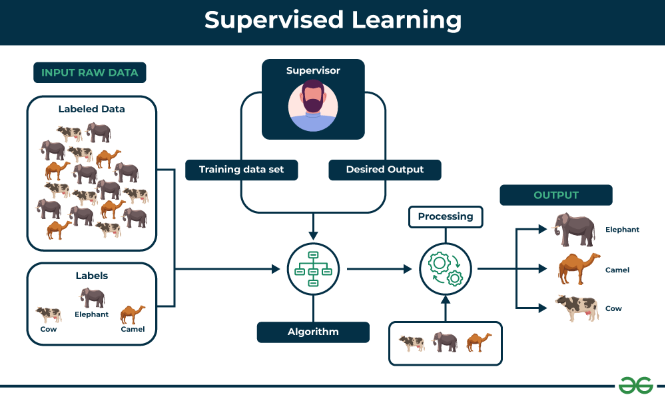

#### 08.01.01 Classification
predicting categorical target variables, which represent discrete classes or labels

##### 08.01.01.01 Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
def lr(x_train, y_train, x_test, y_test, save = False, matrix = False, unmatch = False):
  title = 'Logistic Regression Model'
  model = LogisticRegression()
  train = model.fit(x_train, y_train)
  y_predicted = model.predict(x_test)
  training_score = model.score(x_train, y_train)
  testing_score = model.score(x_test, y_test)

  print('=' * 100)
  print(title)
  print('=' * 100)
  print('Training Score : ', str(round(training_score * 100, 2)), '%')
  #print('Regression Coefficient :', str(train.coef_))
  #print('Regression Interception :', str(train.intercept_))
  print('Testing Score : ', str(round(testing_score * 100, 2)), '%')
  print('=' * 100)
  print('Classification Report\n', classification_report(y_test, y_predicted))
  print('=' * 100)

  if save == True:
    with open(title + '.sav', 'wb') as f:
      pickle.dump(train, f)
      print(title, 'has been saved')
      print('=' * 100)
  else:
    pass

  if matrix == True:
    cm = confusion_matrix(y_test, y_predicted)

    print('Confusion Matrix')
    plt.figure(figsize = (5, 3))
    sns.heatmap(cm, annot = True)
    plt.xlabel('Predicted')
    plt.ylabel('Real')
    plt.show()
  else:
    pass

  if unmatch == True:
    print('=' * 100)
    print('Unmatched Prediction Result')
    print('-' * 100)
    for i in range(0, len(y)):
      if y_predicted[i] != y[i]:
        print ('Predicted : {0}\nActual: {1}\n'.format(y_predicted[i], y[i]))
  else:
    pass

In [62]:
try:
  lr(x_train, y_train, x_test, y_test, save = False, matrix = False, unmatch = False)
except:
  pass

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Model
Training Score :  87.74 %
Testing Score :  86.62 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Classification Report
                                                           precision    recall  f1-score   support

                               abdominal aortic aneurysm       0.74      1.00      0.85        20
                                        abdominal hernia       0.92      0.99      0.95        81
                                         abscess of nose       0.89      0.86      0.88        58
                                     abscess of the lung       1.00      0.83      0.91         6
                                  abscess of the pharynx       0.94      0.98      0.96        63
                                    acanthosis nigricans       0.86      1.00      0.92         6
                                               acariasis       0.83      1.00      0.91         5
                                               achalasia       0.79      0.75      0.77        20
                                                    acne       0.69      0.89      0.78       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### 08.01.01.02 Support Vector Machine

##### 08.01.01.03 Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
def rf(x_train, y_train, x_test, y_test, save = False, matrix = False, unmatch = False):
  title = 'Random Forest Model'
  model = RandomForestClassifier()
  train = model.fit(x_train, y_train)
  y_predicted = model.predict(x_test)
  training_score = model.score(x_train, y_train)
  testing_score = model.score(x_test, y_test)

  print('=' * 100)
  print(title)
  print('=' * 100)
  print('Training Score : ', str(round(training_score * 100, 2)), '%')
  print('Testing Score : ', str(round(testing_score * 100, 2)), '%')
  print('=' * 100)
  print('Classification Report\n', classification_report(y_test, y_predicted))
  print('=' * 100)

  if save == True:
    with open(title + '.sav', 'wb') as f:
      pickle.dump(train, f)
      print(title, 'has been saved')
      print('=' * 100)
  else:
    pass

  if matrix == True:
    cm = confusion_matrix(y_test, y_predicted)

    print('Confusion Matrix')
    plt.figure(figsize = (5, 3))
    sns.heatmap(cm, annot = True)
    plt.xlabel('Predicted')
    plt.ylabel('Real')
    plt.show()
  else:
    pass

  if unmatch == True:
    print('=' * 100)
    print('Unmatched Prediction Result')
    print('-' * 100)
    for i in range(0, len(y)):
      if y_predicted[i] != y[i]:
        print ('Predicted : {0}\nActual: {1}\n'.format(y_predicted[i], y[i]))
  else:
    pass

In [65]:
'''try:
  rf(x_train, y_train, x_test, y_test, save = False, matrix = False, unmatch = False)
except:
  pass #'''

'try:\n  rf(x_train, y_train, x_test, y_test, save = False, matrix = False, unmatch = False)\nexcept:\n  pass #'

##### 08.01.01.04 Decision Tree Classifier

In [66]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [67]:
def dtc(x_train, y_train, x_test, y_test, save = False, matrix = False, unmatch = False):
  title = 'Decision Tree Classifier Model'
  model = DecisionTreeClassifier()
  train = model.fit(x_train, y_train)
  y_predicted = model.predict(x_test)
  training_score = model.score(x_train, y_train)
  testing_score = model.score(x_test, y_test)

  print('=' * 100)
  print(title)
  print('=' * 100)
  print('Training Score : ', str(round(training_score * 100, 2)), '%')
  print('Testing Score : ', str(round(testing_score * 100, 2)), '%')
  print('=' * 100)
  print('Classification Report\n', classification_report(y_test, y_predicted))
  print('=' * 100)

  if save == True:
    with open(title + '.sav', 'wb') as f:
      pickle.dump(train, f)
      print(title, 'has been saved')
      print('=' * 100)
  else:
    pass

  if matrix == True:
    cm = confusion_matrix(y_test, y_predicted)

    print('Confusion Matrix')
    plt.figure(figsize = (5, 3))
    sns.heatmap(cm, annot = True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
  else:
    pass

  if unmatch == True:
    print('=' * 100)
    print('Unmatched Prediction Result')
    print('-' * 100)
    for i in range(0, len(y)):
      if y_predicted[i] != y[i]:
        print ('Predicted : {0}\nActual: {1}\n'.format(y_predicted[i], y[i]))
  else:
    pass

In [68]:
try:
  dtc(x_train, y_train, x_test, y_test, save = False, matrix = False, unmatch = False)
except:
  pass

Decision Tree Classifier Model
Training Score :  92.43 %
Testing Score :  81.45 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Classification Report
                                                           precision    recall  f1-score   support

                               abdominal aortic aneurysm       0.80      1.00      0.89        20
                                        abdominal hernia       0.88      0.93      0.90        81
                                         abscess of nose       0.68      0.90      0.77        58
                                     abscess of the lung       0.86      1.00      0.92         6
                                  abscess of the pharynx       0.80      0.94      0.86        63
                                    acanthosis nigricans       0.75      1.00      0.86         6
                                               acariasis       0.45      1.00      0.62         5
                                               achalasia       0.53      0.90      0.67        20
                                                    acne       0.56      0.79      0.66       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### 08.01.01.05 K-Nearest Neighbors (KNN)

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
def knn(x_train, y_train, x_test, y_test, save = False, matrix = False, unmatch = False):
  title = 'K-Nearest Neighbors Model'
  model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  sc = StandardScaler()
  x_train_sc = sc.fit_transform(x_train)
  x_test_sc = sc.transform(x_test)

  train = model.fit(x_train_sc, y_train)
  y_predicted = model.predict(x_test_sc)
  training_score = model.score(x_train_sc, y_train)
  testing_score = model.score(x_test_sc, y_test)

  print('=' * 100)
  print(title)
  print('=' * 100)
  print('Training Score : ', str(round(training_score * 100, 2)), '%')
  print('Testing Score : ', str(round(testing_score * 100, 2)), '%')
  print('=' * 100)
  print('Classification Report\n', classification_report(y_test, y_predicted))
  print('=' * 100)

  if save == True:
    with open(title + '.sav', 'wb') as f:
      pickle.dump(train, f)
      print(title, 'has been saved')
      print('=' * 100)
  else:
    pass

  if matrix == True:
    cm = confusion_matrix(y_test, y_predicted)

    print('Confusion Matrix')
    plt.figure(figsize = (5, 3))
    sns.heatmap(cm, annot = True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
  else:
    pass

  if unmatch == True:
    print('=' * 100)
    print('Unmatched Prediction Result')
    print('-' * 100)
    for i in range(0, len(y)):
      if y_predicted[i] != y[i]:
        print ('Predicted : {0}\nActual: {1}\n'.format(y_predicted[i], y[i]))
  else:
    pass

In [71]:
try:
  knn(x_train, y_train, x_test, y_test, save = False, matrix = False, unmatch = False)
except:
  pass

K-Nearest Neighbors Model
Training Score :  87.83 %
Testing Score :  82.01 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Classification Report
                                                           precision    recall  f1-score   support

                               abdominal aortic aneurysm       0.77      1.00      0.87        20
                                        abdominal hernia       0.93      0.95      0.94        81
                                         abscess of nose       0.62      0.90      0.73        58
                                     abscess of the lung       0.86      1.00      0.92         6
                                  abscess of the pharynx       0.72      0.87      0.79        63
                                    acanthosis nigricans       0.62      0.83      0.71         6
                                               acariasis       0.67      0.80      0.73         5
                                               achalasia       0.49      0.95      0.64        20
                                                    acne       0.56      0.80      0.66       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
